In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score,KFold, StratifiedKFold, train_test_split 
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
import time

In [3]:
# Convert DataFrame to numpy array
data = pd.read_csv('C:/Users/Usuario/Desktop/MBA/TFM/DataEDA/AGDA.csv')
data = data.drop('LOCUS', axis=1)
columns = data.columns

## I.Random Forest: Parametros por defecto

419.1067099571228


[['BerlethS1_tair', 0.8593794172699591, -0.023294546345193012],
 ['BerlethS2_tair', 0.8483774812194818, -0.35313948760182234],
 ['BerlethS3_tair', 0.8459537813307555, -0.1339340188162792],
 ['BerlethS4_tair', 0.8397239503286752, -0.026887243628171076],
 ['BerlethS5_tair', 0.8524815641909729, 0.014590706067324155],
 ['BerlethS6_tair', 0.9136444054449291, 0.34937966323929814],
 ['CitovskyJ25_tair', 0.9416871669246508, 0.5975080628252927],
 ['CitovskyJ26_tair', 0.8780170169966244, 0.14810244480340495],
 ['ConstantinoV11_tair', 0.8460234275670628, -1.5450944381293423],
 ['ConstantinoV13_tair', 0.8951990207078862, 0.26507803159686305],
 ['ConstantinoV14_tair', 0.9028138214403016, 0.3329429468636034],
 ['FatlandSlide1121800_tair', 0.8699845848793435, 0.04596467482387234],
 ['FatlandSlide2121800_tair', 0.9099721432006959, 0.3848072805184023],
 ['Krizekslide2112000_tair', 0.8760423635884786, 0.11915805157025783],
 ['Moehsslide1101800_tair', 0.8788596272437776, 0.49299711429526044],
 ['Moehssli

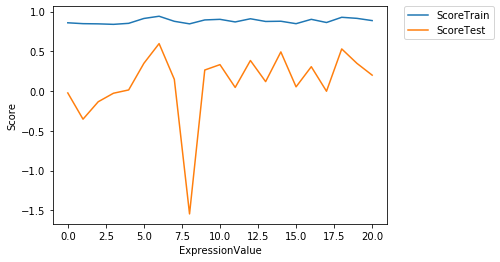

In [3]:
def random_forest(data):
    """
    data = Dataframe from DataEDA/AGDA.csv
    """
    start_time=time.time()# Computational cost
    array = []
    columns = data.columns

    scoreTrain=[] # Array of scores from Train
    scoreTest=[] # Array of scores from Test
    """
        Algorithm implementation 
        every iteration in the dataframe
    """
    for col in columns:
        y = data[col]
        X = data.drop(col, axis=1)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.20, random_state=42)
        clf = RandomForestRegressor()
        clf.fit(X_train, y_train)
        score_train = clf.score(X_train,y_train)
        score_test = clf.score(X_test, y_test)
        array.append([col, score_train,score_test])
        
    """ Graph with Matplotlib""" 
    ordenadas = np.arange(len(array))
    for i,l in zip(array,ordenadas):
        scoreTrain.append(i[1])
        scoreTest.append(i[2])
        
    plt.plot(ordenadas,scoreTrain,label='ScoreTrain')
    plt.plot(ordenadas,scoreTest,label='ScoreTest')
    plt.xlabel('ExpressionValue')
    plt.ylabel('Score')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        
    print(time.time()-start_time)
    return array
random_forest(data)

## II. Random Forest: Parametros n_stimators,max_depth,min_samples_leaf

368.2684097290039


[['BerlethS1_tair', 0.6708392810478118, -0.07596602103700145],
 ['BerlethS2_tair', 0.5779509796442666, -0.42563799598719587],
 ['BerlethS3_tair', 0.6586939516927863, -0.14230127133769654],
 ['BerlethS4_tair', 0.7909803800241524, -0.07422601279581764],
 ['BerlethS5_tair', 0.7620420965684058, 0.006585281401715992],
 ['BerlethS6_tair', 0.7418850658191196, 0.34673828456515143],
 ['CitovskyJ25_tair', 0.838540003716951, 0.6024841023225629],
 ['CitovskyJ26_tair', 0.6100582966543731, 0.1657422006057333],
 ['ConstantinoV11_tair', 0.7733635086690849, -1.2343370177154056],
 ['ConstantinoV13_tair', 0.7248332977343781, 0.26156529618344626],
 ['ConstantinoV14_tair', 0.683259462266874, 0.3482163260848996],
 ['FatlandSlide1121800_tair', 0.4859282123098039, 0.05341191899047971],
 ['FatlandSlide2121800_tair', 0.7322657985406804, 0.38649343177163087],
 ['Krizekslide2112000_tair', 0.4629203675447813, 0.12242256621369207],
 ['Moehsslide1101800_tair', 0.824378210022939, 0.4920427528730105],
 ['Moehsslide210

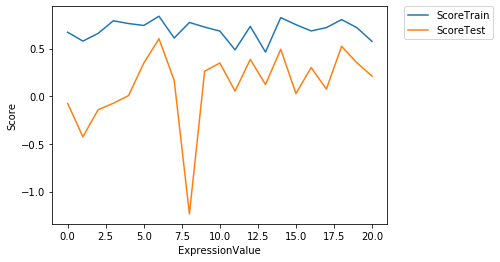

In [7]:
def random_forest(data):
    start_time=time.time()# Gasto computacional
    array = []
    columns = data.columns
    scoreTrain=[]
    scoreTest=[]
    
    for col in columns:
        y = data[col]
        X = data.drop(col, axis=1)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.20, random_state=42)
        clf = RandomForestRegressor(n_estimators=150, max_depth=10, min_samples_leaf=1)
        clf.fit(X_train, y_train)
        score_train = clf.score(X_train,y_train)
        score_test = clf.score(X_test, y_test)
        array.append([col, score_train,score_test])
        
    """ Graph with Matplotlib"""
    ordenadas = np.arange(len(array))
    for i,l in zip(array,ordenadas):
        scoreTrain.append(i[1])
        scoreTest.append(i[2])
        
    plt.plot(ordenadas,scoreTrain,label='ScoreTrain')
    plt.plot(ordenadas,scoreTest,label='ScoreTest')
    plt.xlabel('ExpressionValue')
    plt.ylabel('Score')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        
    print(time.time()-start_time)
    return array
random_forest(data)

In [ ]:
# n_estimators: In general the more trees the less likely the algorithm is to overfit. 
#     So try increasing this. The lower this number, the closer the model is to a decision tree, with a restricted feature set.
# max_features: try reducing this number (try 30-50% of the number of features). This determines how many features each tree 
#     is randomly assigned. The smaller, the less likely to overfit, but too small will start to introduce under fitting.
# max_depth: Experiment with this. This will reduce the complexity of the learned models, lowering over fitting risk. 
#     Try starting small, say 5-10, and increasing you get the best result.
# min_samples_leaf: Try setting this to values greater than one. This has a similar effect to the max_depth parameter, 
#     it means the branch will stop splitting once the leaves have that number of samples each.

## Random Forest: n_estimators, max_depth, min_samples_leaf, max_features

585.1946175098419


[['BerlethS1_tair', 0.3017275233323956, 0.1547905244717276],
 ['BerlethS2_tair', 0.21136134295418219, 0.08037655108158681],
 ['BerlethS3_tair', 0.10239114258630133, -0.0373299713960078],
 ['BerlethS4_tair', 0.23966594244614745, 0.12912083661619278],
 ['BerlethS5_tair', 0.2674220197378284, 0.02003406265603891],
 ['BerlethS6_tair', 0.6249290185759244, 0.35247590922041794],
 ['CitovskyJ25_tair', 0.7521223184418303, 0.6052337115434443],
 ['CitovskyJ26_tair', 0.459649326831285, 0.17118777092438242],
 ['ConstantinoV11_tair', 0.17803383776662374, -0.3960082018904916],
 ['ConstantinoV13_tair', 0.28352830736688306, 0.271033874867586],
 ['ConstantinoV14_tair', 0.5665734086356071, 0.3478644794393685],
 ['FatlandSlide1121800_tair', 0.35264139970316727, 0.0787630183806105],
 ['FatlandSlide2121800_tair', 0.6046817047490711, 0.3841789158343354],
 ['Krizekslide2112000_tair', 0.3845369085359963, 0.11665105716869373],
 ['Moehsslide1101800_tair', 0.43775363902625297, 0.5242096648118002],
 ['Moehsslide210

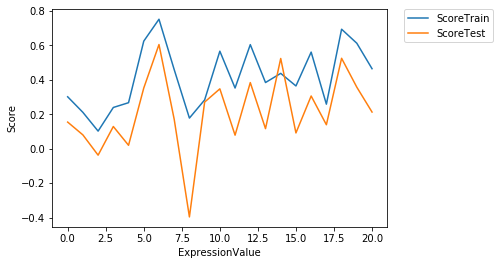

In [9]:
def random_forest(data):
    start_time=time.time()# Gasto computacional
    array = []
    columns = data.columns
    scoreTrain=[]
    scoreTest=[]
    
    for col in columns:
        y = data[col]
        X = data.drop(col, axis=1)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.20, random_state=42)
        clf = RandomForestRegressor(n_estimators=250, max_depth=10, min_samples_leaf=10, max_features=20)
        clf.fit(X_train, y_train)
        score_train = clf.score(X_train,y_train)
        score_test = clf.score(X_test, y_test)
        array.append([col, score_train,score_test])
        
    """ Graph with Matplotlib"""
    ordenadas = np.arange(len(array))
    for i,l in zip(array,ordenadas):
        scoreTrain.append(i[1])
        scoreTest.append(i[2])
        
    plt.plot(ordenadas,scoreTrain,label='ScoreTrain')
    plt.plot(ordenadas,scoreTest,label='ScoreTest')
    plt.xlabel('ExpressionValue')
    plt.ylabel('Score')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        
    print(time.time()-start_time)
    return array
random_forest(data)

## MLP: Parametros por defecto

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_it

134.5172517299652


[['BerlethS1_tair', 0.291332619660858, 0.041621813516032224],
 ['BerlethS2_tair', 0.3937483644291614, -0.2945570106794466],
 ['BerlethS3_tair', 0.20652583167685432, -0.14540847844189186],
 ['BerlethS4_tair', 0.420098020503285, -0.015022620596722767],
 ['BerlethS5_tair', 0.2311072684648655, -0.0014932509942167105],
 ['BerlethS6_tair', 0.4693701180906735, 0.29578586984570854],
 ['CitovskyJ25_tair', 0.647860866514387, 0.5589954638522258],
 ['CitovskyJ26_tair', 0.2620821719814931, 0.07785573440746352],
 ['ConstantinoV11_tair', 0.3680125389403177, -0.7050930290329525],
 ['ConstantinoV13_tair', 0.6400587142371617, -0.057427018737741704],
 ['ConstantinoV14_tair', 0.41631794257092947, 0.28423376291369706],
 ['FatlandSlide1121800_tair', 0.2186515538810242, -0.07278003326362947],
 ['FatlandSlide2121800_tair', 0.5365917608442412, 0.2927345824788108],
 ['Krizekslide2112000_tair', 0.2843867421891816, 0.02127933803537274],
 ['Moehsslide1101800_tair', 0.4702106003608869, 0.44247215270607515],
 ['Moeh

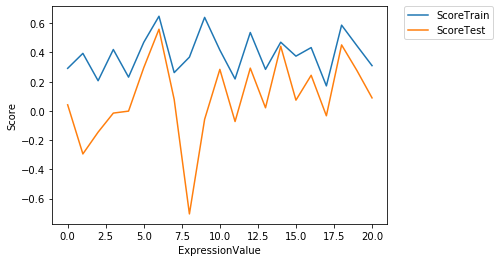

In [4]:
def mlp(data):
    """
    data = Dataframe from DataEDA/AGDA.csv
    """
    start_time=time.time() # Computational cost
    array = []
    columns = data.columns
    scoreTrain=[] # Array of scores from Train
    scoreTest=[] # Array of scores from Test
    """
        Algorithm implementation 
        every iteration in the dataframe
    """    
    for col in columns:
        y = data[col]
        X = data.drop(col, axis=1)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.20, random_state=42)
        mlp = MLPRegressor()
        labels = y_train.values.ravel()
        mlp.fit(X_train, labels)
        resultado_mlp = mlp.predict(X_test)
        score_train = mlp.score(X_train, y_train)
        score_test = mlp.score(X_test, y_test)
        array.append([col, score_train,score_test,])
        
    """ Graph with Matplotlib"""
    ordenadas = np.arange(len(array))
    for i,l in zip(array,ordenadas):
        scoreTrain.append(i[1])
        scoreTest.append(i[2])
        
    plt.plot(ordenadas,scoreTrain,label='ScoreTrain')
    plt.plot(ordenadas,scoreTest,label='ScoreTest')
    plt.xlabel('ExpressionValue')
    plt.ylabel('Score')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    print(time.time()-start_time)
    return array
mlp(data)

### MLP Parámetros hidden layer sizes actviation

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_it

296.97666335105896


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[['BerlethS1_tair', 0.2920410583229003, -0.05751654120750893],
 ['BerlethS2_tair', 0.20657022616777518, -0.12291137769032412],
 ['BerlethS3_tair', 0.45077025122477565, -0.09887811051829853],
 ['BerlethS4_tair', 0.6971170465041296, -0.07070983004784015],
 ['BerlethS5_tair', 0.2631869259020292, -0.01864065397521908],
 ['BerlethS6_tair', 0.49089190475344613, 0.2308842052014889],
 ['CitovskyJ25_tair', 0.6367948542654694, 0.537717608849472],
 ['CitovskyJ26_tair', 0.2659884603800342, 0.035223875275975924],
 ['ConstantinoV11_tair', 0.5511674651671243, -0.9155916126203703],
 ['ConstantinoV13_tair', 0.3331146397041488, -0.006925215257815198],
 ['ConstantinoV14_tair', 0.4534797582808382, 0.215382811376151],
 ['FatlandSlide1121800_tair', 0.21378671272718475, -0.0853860734943026],
 ['FatlandSlide2121800_tair', 0.4710823644390949, 0.2937232311117468],
 ['Krizekslide2112000_tair', 0.2544240638606692, 0.007119271828515794],
 ['Moehsslide1101800_tair', 0.4680875260874753, 0.4669998737440433],
 ['Moehs

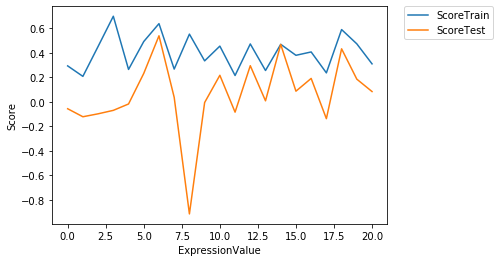

In [10]:
def mlp(data):
    """
    data = Dataframe from DataEDA/AGDA.csv
    """
    start_time=time.time()
    array = []
    columns = data.columns
    scoreTrain=[]
    scoreTest=[]
    for col in columns:
        y = data[col]
        X = data.drop(col, axis=1)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.20, random_state=42)
        mlp = MLPRegressor(hidden_layer_sizes=(15,10,10,15), activation = 'tanh', solver='adam', alpha=0.00001, 
        learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, 
        random_state=None, tol=0.0001, verbose=False,warm_start=False, momentum=0.9, nesterovs_momentum=True, 
        early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)
        labels = y_train.values.ravel()
        mlp.fit(X_train, labels)
        resultado_mlp = mlp.predict(X_test)
        score_train = mlp.score(X_train, y_train)
        score_test = mlp.score(X_test, y_test)
        array.append([col, score_train,score_test,])

    """ Graph with Matplotlib"""
    ordenadas = np.arange(len(array))
    for i,l in zip(array,ordenadas):
        scoreTrain.append(i[1])
        scoreTest.append(i[2])
        
    plt.plot(ordenadas,scoreTrain,label='ScoreTrain')
    plt.plot(ordenadas,scoreTest,label='ScoreTest')
    plt.xlabel('ExpressionValue')
    plt.ylabel('Score')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    
    print(time.time()-start_time)
    return array
mlp(data)

In [ ]:
### Mlp: Parametros

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_it

130.75770473480225


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[['BerlethS1_tair', 0.15419647324495056, 0.08464648533658525],
 ['BerlethS2_tair', 0.1091507550257571, -0.0247825576089864],
 ['BerlethS3_tair', 0.06739309452028308, -0.059197787939087476],
 ['BerlethS4_tair', 0.1434629719612499, 0.08885782581587998],
 ['BerlethS5_tair', 0.12097393630653018, 0.01987605823250227],
 ['BerlethS6_tair', 0.42625287854617844, 0.3058562089238682],
 ['CitovskyJ25_tair', 0.6093857235966218, 0.557233844087299],
 ['CitovskyJ26_tair', 0.21275857909225848, 0.10749612073408078],
 ['ConstantinoV11_tair', 0.10056175348527197, -0.218777947843531],
 ['ConstantinoV13_tair', 0.18639035189204967, 0.1478967976146296],
 ['ConstantinoV14_tair', 0.3700964127107169, 0.282330595300599],
 ['FatlandSlide1121800_tair', 0.13003791744161164, -0.012642478120726164],
 ['FatlandSlide2121800_tair', 0.42315130739690554, 0.3240559712918465],
 ['Krizekslide2112000_tair', 0.187136189517623, 0.05546959235308946],
 ['Moehsslide1101800_tair', 0.3327050582001524, 0.5123766737142468],
 ['Moehssli

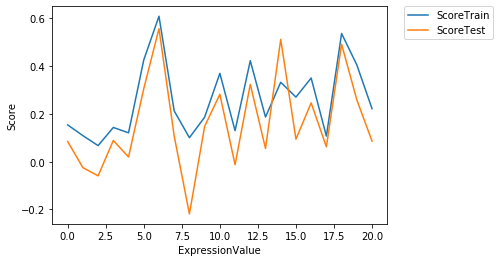

In [11]:
def mlp(data):
    
    start_time=time.time()
    array = []
    columns = data.columns
    scoreTrain=[]
    scoreTest=[]
    for col in columns:
        y = data[col]
        X = data.drop(col, axis=1)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.20, random_state=42)
        mlp = MLPRegressor(hidden_layer_sizes=(15,), activation = 'tanh', solver='adam', alpha=0.00001, 
        learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, 
        random_state=None, tol=0.0001, verbose=False,warm_start=False, momentum=0.9, nesterovs_momentum=True, 
        early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)
        labels = y_train.values.ravel()
        mlp.fit(X_train, labels)
        resultado_mlp = mlp.predict(X_test)
        score_train = mlp.score(X_train, y_train)
        score_test = mlp.score(X_test, y_test)
        array.append([col, score_train,score_test,])

    """ Graph with Matplotlib"""
    ordenadas = np.arange(len(array))
    for i,l in zip(array,ordenadas):
        scoreTrain.append(i[1])
        scoreTest.append(i[2])
        
    plt.plot(ordenadas,scoreTrain,label='ScoreTrain')
    plt.plot(ordenadas,scoreTest,label='ScoreTest')
    plt.xlabel('ExpressionValue')
    plt.ylabel('Score')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    
    print(time.time()-start_time)
    return array
mlp(data)